
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [1]:
## 깃허브 : https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/tree/master
## ARIMA-And-Seasonal-ARIMA
## 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'/content'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_filepath = '/content/drive/MyDrive/ARIMA-And-Seasonal-ARIMA-master/debt_cycle.csv'

In [5]:
# df=pd.read_csv('perrin-freres-monthly-champagne-.csv')
df=pd.read_csv(dataset_filepath)

In [6]:
df.head()

,Date,Debt,y,Cycle
0,1790-01-01,27.92,0.000000,27.920000
1,1791-01-01,28.51,0.214592,28.295408
2,1792-01-01,26.86,0.429185,26.430815
3,1793-01-01,25.01,0.643777,24.366223
4,1794-01-01,21.16,0.858369,20.301631


In [ ]:
df.tail()

,Date,Debt,y,Cycle
229,2019-01-01,104.83,49.141631,55.688369
230,2020-01-01,107.83,49.356223,58.473777
231,2021-01-01,126.08,49.570815,76.509185
232,2022-01-01,122.88,49.785408,73.094592
233,2023-01-01,118.58,50.000000,68.580000


In [7]:
# Convert Month into Datetime
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.head()

,Date,Debt,y,Cycle
0,1790-01-01,27.92,0.000000,27.920000
1,1791-01-01,28.51,0.214592,28.295408
2,1792-01-01,26.86,0.429185,26.430815
3,1793-01-01,25.01,0.643777,24.366223
4,1794-01-01,21.16,0.858369,20.301631


In [9]:
df.set_index('Date',inplace=True)

In [ ]:
df.head()

,Debt,y,Cycle
Date,,,
1790-01-01,27.92,0.000000,27.920000
1791-01-01,28.51,0.214592,28.295408
1792-01-01,26.86,0.429185,26.430815
1793-01-01,25.01,0.643777,24.366223
1794-01-01,21.16,0.858369,20.301631


In [ ]:
df.describe()

,Debt,y,Cycle
count,234.000000,234.000000,234.000000
mean,31.737949,25.000000,6.737949
std,30.118084,14.526645,21.216242
min,0.000000,0.000000,-19.208627
25%,8.565000,12.500000,-9.821395
50%,23.265000,25.000000,2.053777
75%,45.630000,37.500000,14.320590
max,126.080000,50.000000,87.723605


## Step 2: Visualize the Data

<Axes: xlabel='Date'>

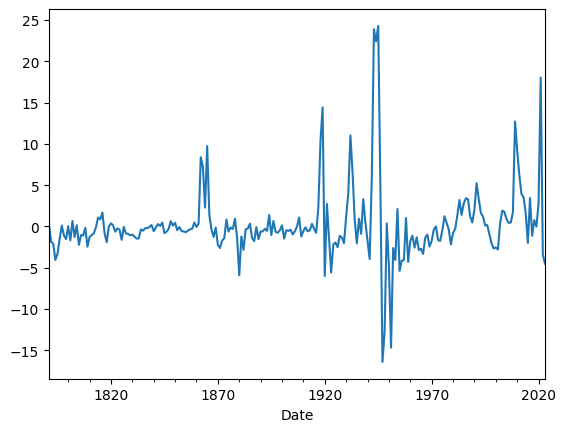

In [11]:
df['Cycle'].diff().dropna().plot()
# df.plot()

In [12]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [13]:
## Data가 Stationary(정상성) 특성을 보이는지 테스트하는 코드
test_result=adfuller(df['Cycle'])

In [14]:
## ## Data가 Stationary(정상성) 특성을 보이는지 테스트하고 결과를 보여주는 함수
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [15]:

adfuller_test(df['Cycle'].diff().dropna())

ADF Test Statistic : -8.374094057912142
p-value : 2.614456092517407e-13
#Lags Used : 1
Number of Observations Used : 231
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

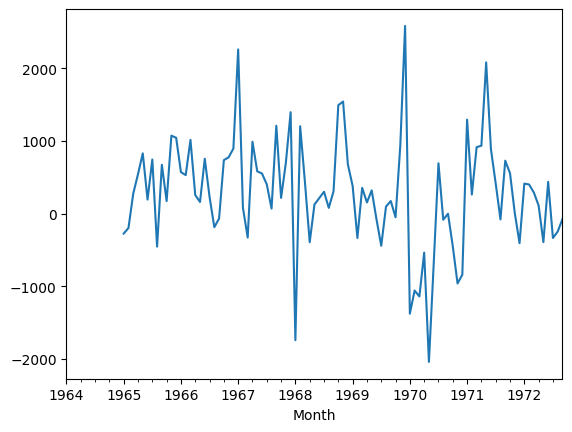

In [ ]:
df['Seasonal First Difference'].plot()

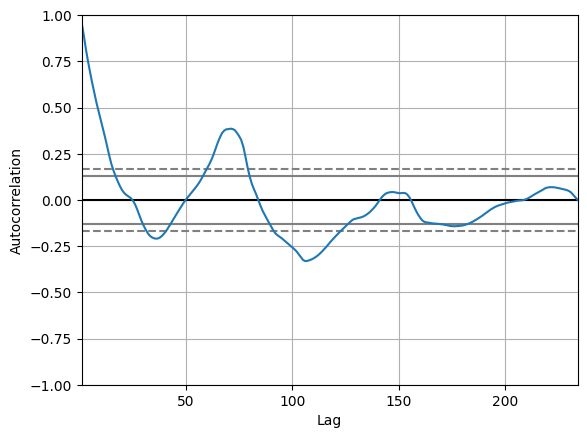

In [16]:
# 시계열에 대한 자기상관 도표.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Cycle'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [17]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


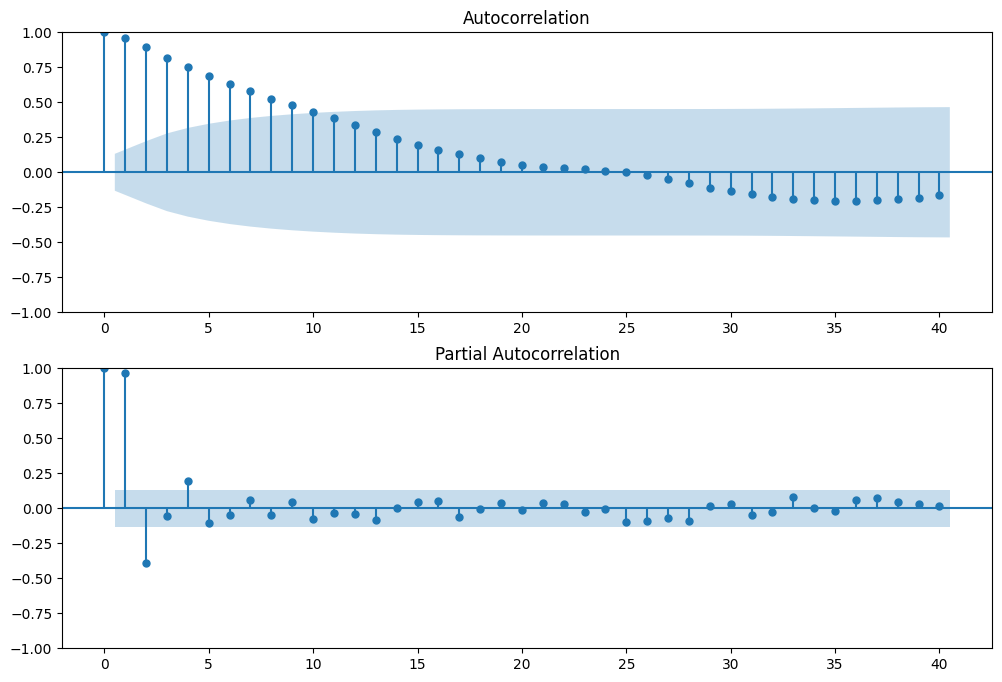

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Cycle'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Cycle'].iloc[13:],lags=40,ax=ax2)

In [19]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# model=ARIMA(df['Cycle'].diff().dropna(), order=(1,1,1))
model=ARIMA(df['Cycle'], order=(2,1,0))
model_fit=model.fit() # 학습시키기

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
# model_fit.plot_diagnostics(figsize=(12, 8))

In [ ]:
df['forecast_ARIMA']=model_fit.predict(start="2023-01-01",end="2198-01-01",dynamic=True)

In [ ]:
# 여기 년도는 years=x  range 범위는 1 = 1년
# 여기 월별로는 months=x  range 범위는 1 = 1달
from pandas.tseries.offsets import DateOffset
future_dates_arima=[df.index[-1]+ DateOffset(years=x) for x in range(0,75)]  # 20년
# future_dates_arima=[df.index[-1]+ DateOffset(months=x) for x in range(0,36)]  # 3년

In [ ]:
future_datest_df_arima=pd.DataFrame(index=future_dates_arima[1:],columns=df.columns)

In [ ]:
future_datest_df_arima.tail(5)

,Debt,y,Cycle,forecast,forecast_ARIMA,forecast_SARIMA
2093-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2094-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2095-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2096-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2097-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_df_arima=pd.concat([df,future_datest_df_arima])

<Axes: >

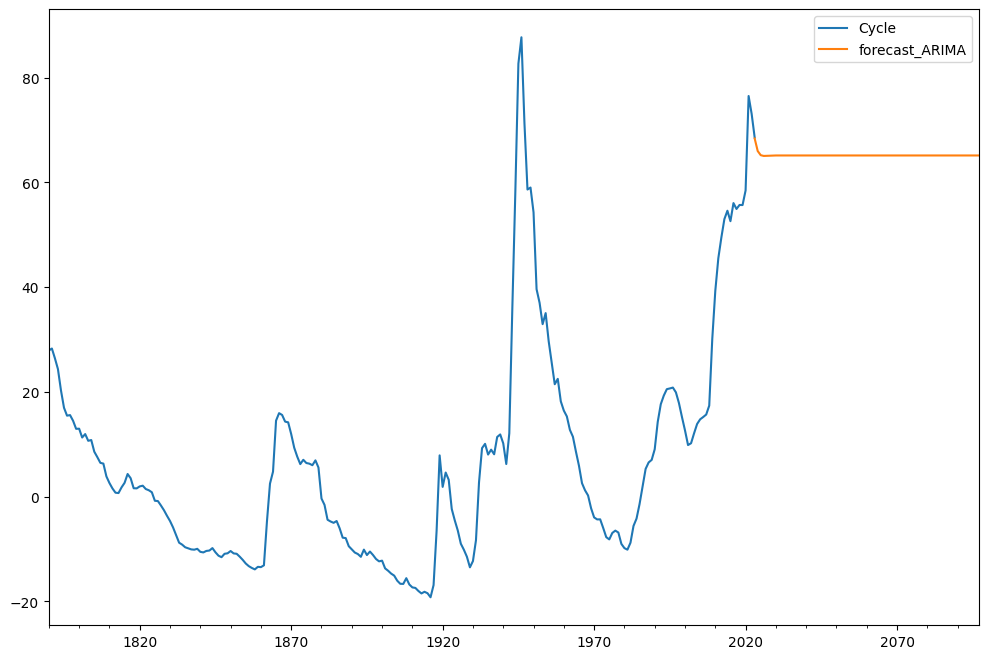

In [ ]:
future_df_arima['forecast_ARIMA'] = model_fit.predict(start = "2023-01-01", end = "2123-01-01", dynamic= True)
future_df_arima[['Cycle', 'forecast_ARIMA']].plot(figsize=(12, 8))

In [ ]:
future_df_arima.tail()

,Debt,y,Cycle,forecast,forecast_ARIMA,forecast_SARIMA
2039-01-01,NaN,NaN,NaN,NaN,0.177327,NaN
2040-01-01,NaN,NaN,NaN,NaN,0.177377,NaN
2041-01-01,NaN,NaN,NaN,NaN,0.177405,NaN
2042-01-01,NaN,NaN,NaN,NaN,0.177419,NaN
2043-01-01,NaN,NaN,NaN,NaN,0.177427,NaN


In [ ]:
import statsmodels.api as sm

In [ ]:
# 월단위는 seasonal_order=(1,1,1,4)
# 년단위는 seasonal_order=(1,1,1,12)
model=sm.tsa.statespace.SARIMAX(df['Cycle'],order=(1, 1, 1),seasonal_order=(1,1,1,100))
# model=sm.tsa.statespace.SARIMAX(df['Cycle_Curve'],order=(1, 1, 1),seasonal_order=(1,1,1,4))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
# results.plot_diagnostics(figsize=(12, 8))

In [ ]:
df['forecast_SARIMA']=results.predict(start="2023-01-01", end = "2123-01-01",dynamic=True)
# df[['Cycle','forecast_SARIMA']].plot(figsize=(12,8))

In [ ]:
# 여기 년도는 years=x
# 여기 월별로는 months=x
from pandas.tseries.offsets import DateOffset
future_dates_sarima=[df.index[-1]+ DateOffset(years=x) for x in range(0,101)] #이건 year라서 20년
# future_dates_sarima=[df.index[-1]+ DateOffset(months=x) for x in range(0,36)]  #이건 months라서 1년 주려면 12 줘야함

In [ ]:
future_datest_df_sarima=pd.DataFrame(index=future_dates_sarima[1:],columns=df.columns)

In [ ]:
future_datest_df_sarima.tail(5)
# df.tail()

,Debt,y,Cycle,forecast,forecast_ARIMA,forecast_SARIMA
2119-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2120-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2121-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2122-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2123-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_df_sarima=pd.concat([df,future_datest_df_sarima])

<Axes: >

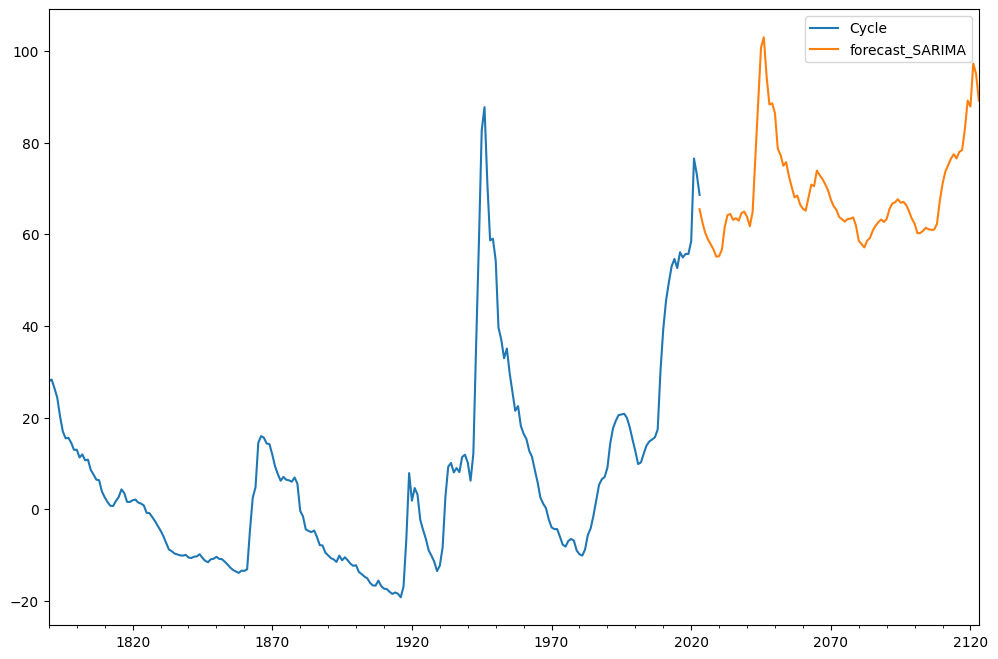

In [ ]:
future_df_sarima['forecast_SARIMA'] = results.predict( start="2023-01-01", end = "2123-01-01", dynamic= True)
future_df_sarima[['Cycle', 'forecast_SARIMA']].plot(figsize=(12, 8))